## Exploratory data analysis (EDA)
This notebook seeks to find any insights that may be useful for the determining what numeric and demographic characteristics have an influence on whether a client will end their membership with Telco.

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [7]:
## Load dataset
df = pd.read_csv('../data/cleaned/cleaned_telco_customer_churn.csv')
df.head()

#Convert Senior citzen and Churn to categorical variables
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['Churn'] = df['Churn'].astype('category')   

In [4]:
#Quick look at the data
print("\nDataframe Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

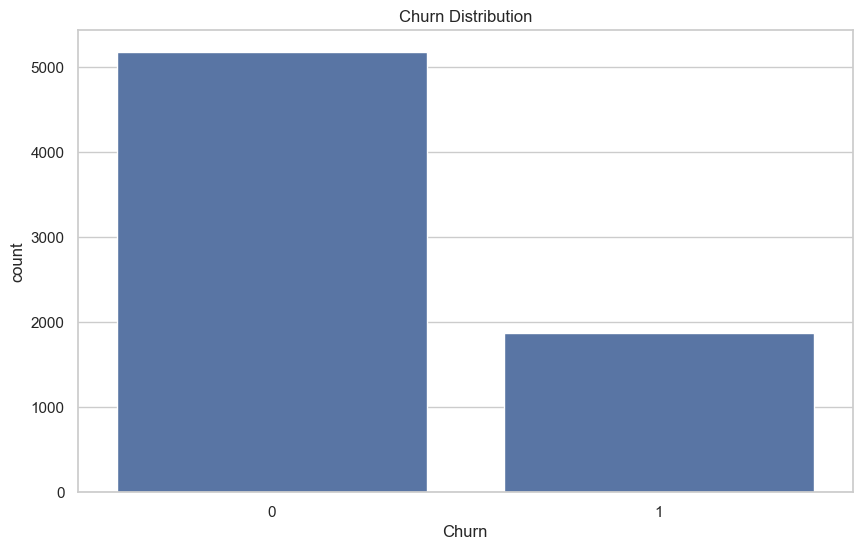


Churn Rate:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [8]:
##Target variable analysis
if 'Churn' in df.columns:
    sns.countplot(x='Churn', data=df)
    plt.title('Churn Distribution')
    plt.show()

    churn_rate = df['Churn'].value_counts(normalize=True)
    print("\nChurn Rate:")
    print(churn_rate)
else:
    print("No 'Churn' column found. Please update target variable name.")


Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


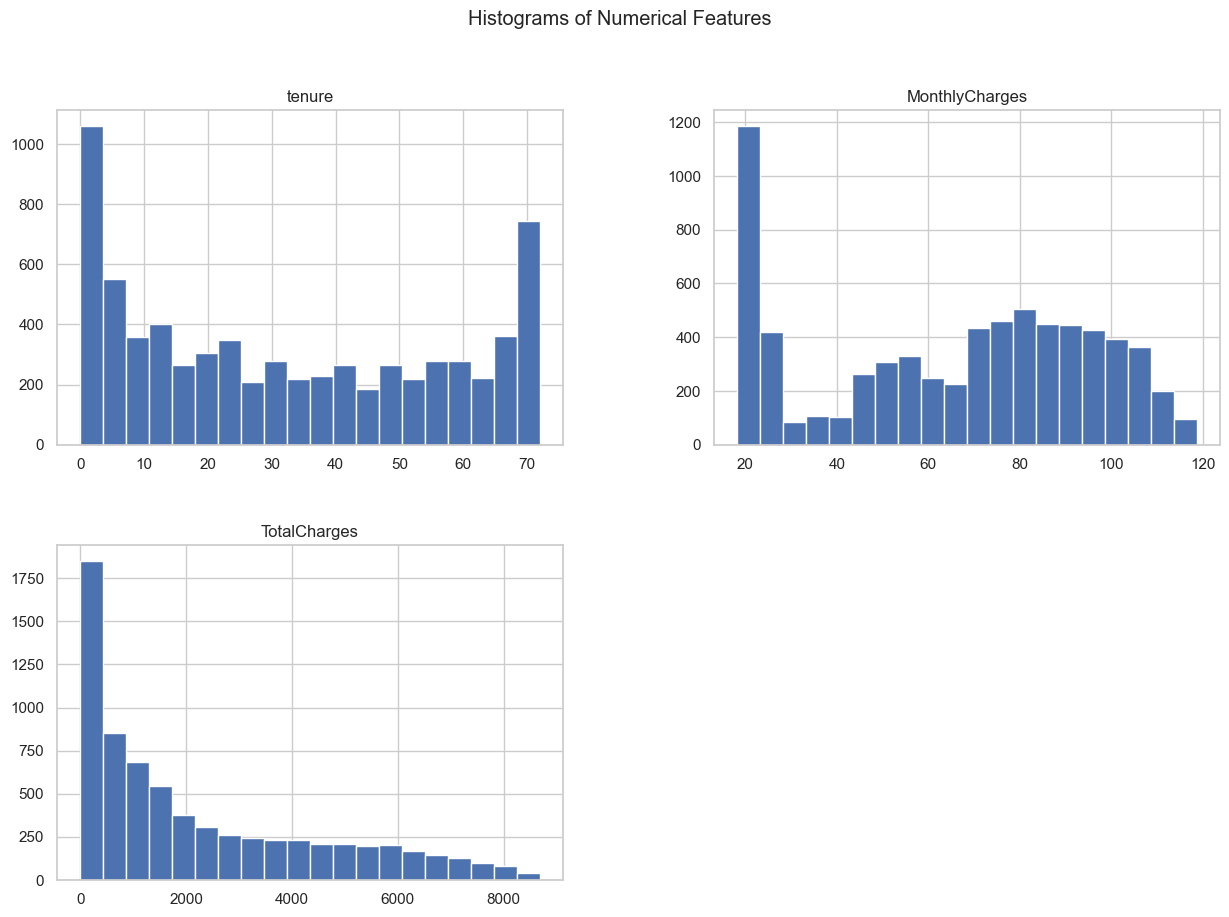

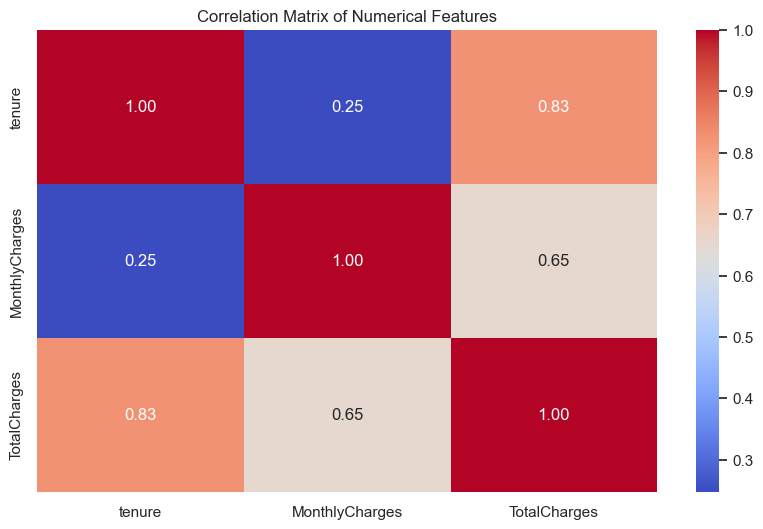

In [9]:
## Numerical features analysis
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical Columns:", numerical_cols)

#Histograms for numerical features
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

#Correlation matrix
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Categorical Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


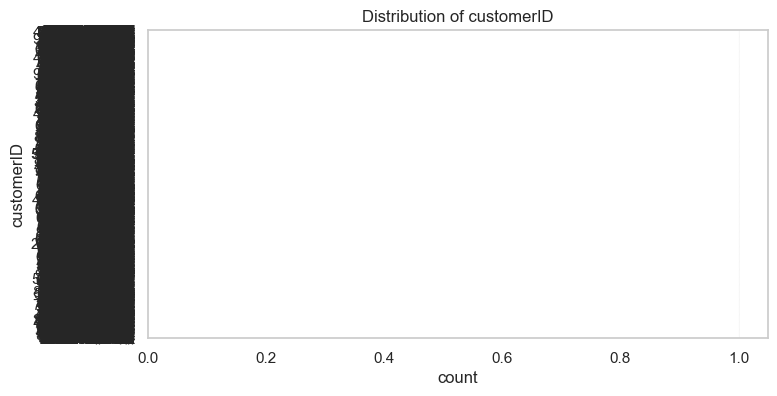

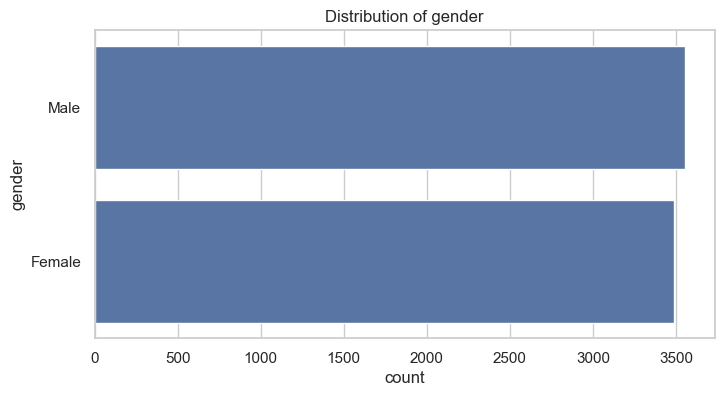

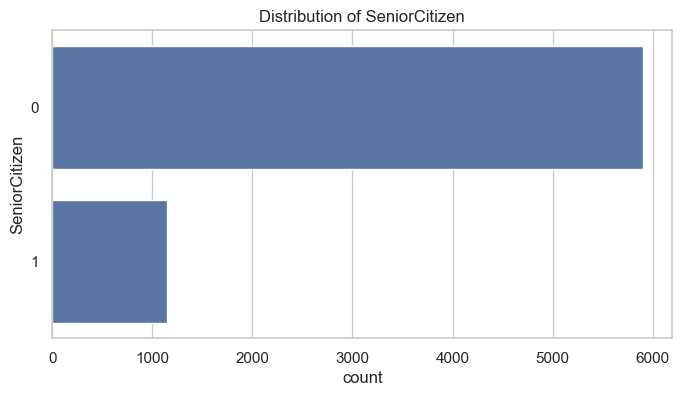

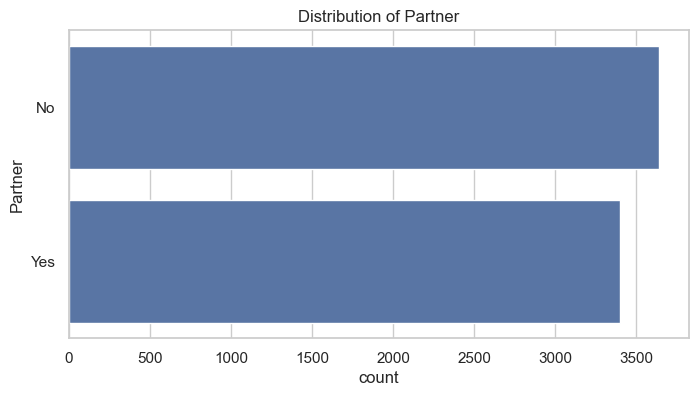

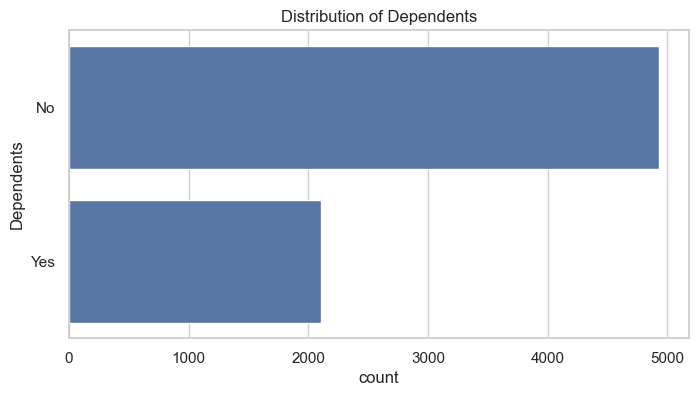

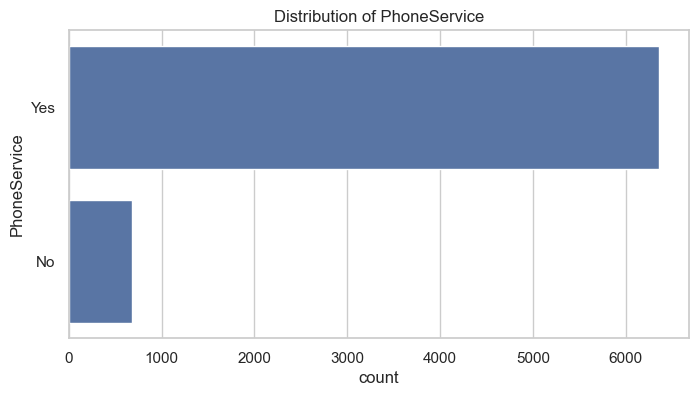

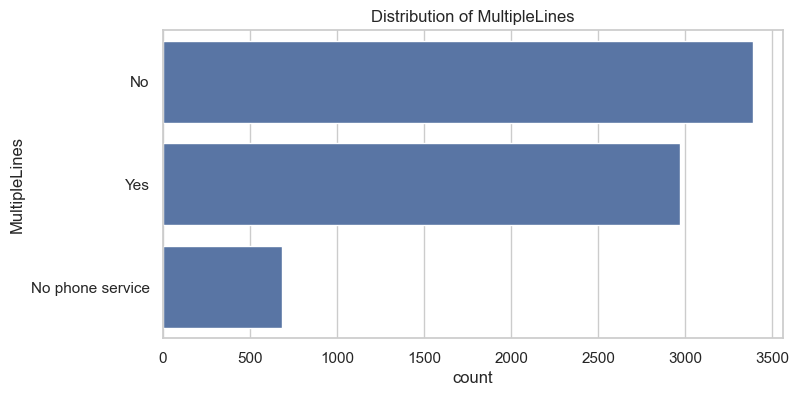

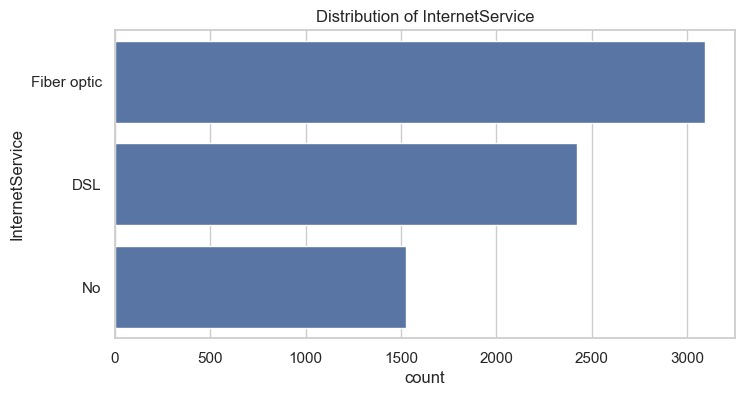

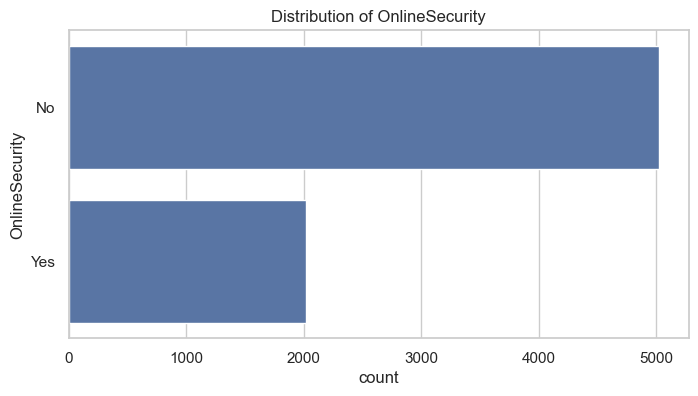

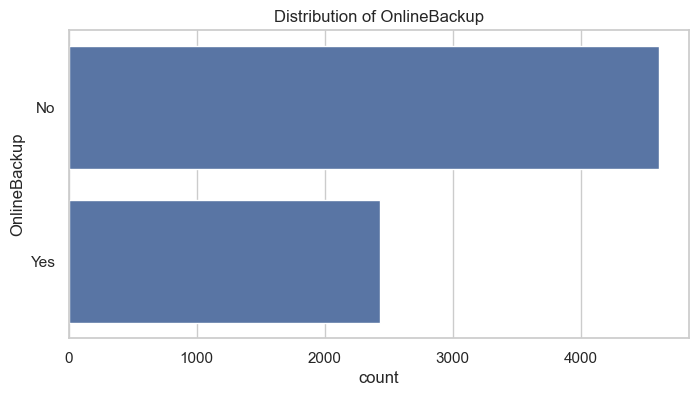

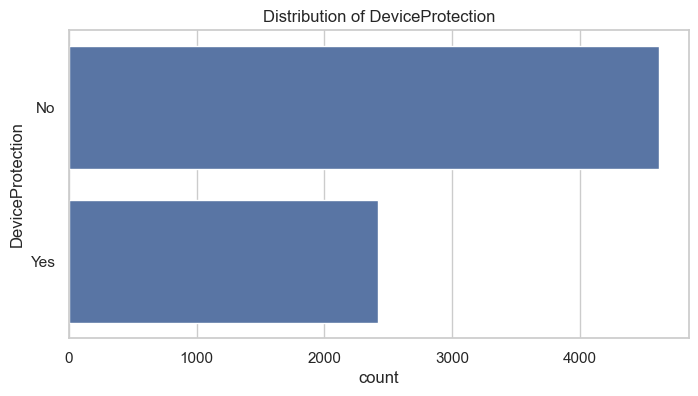

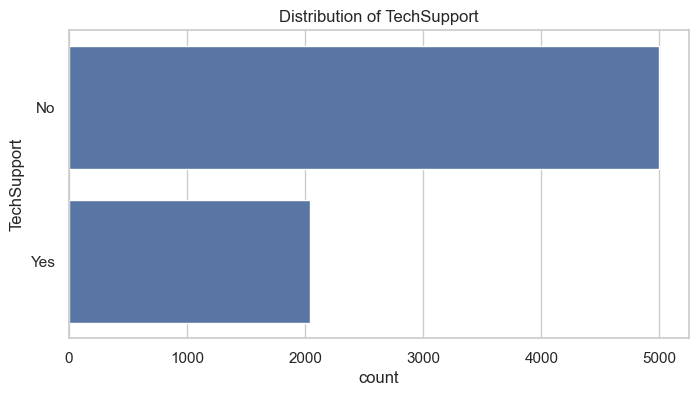

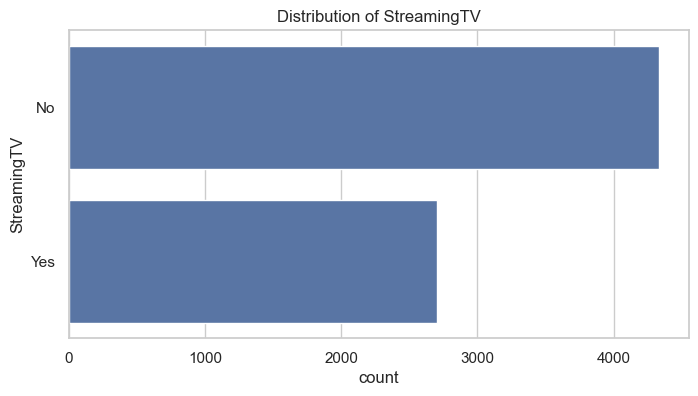

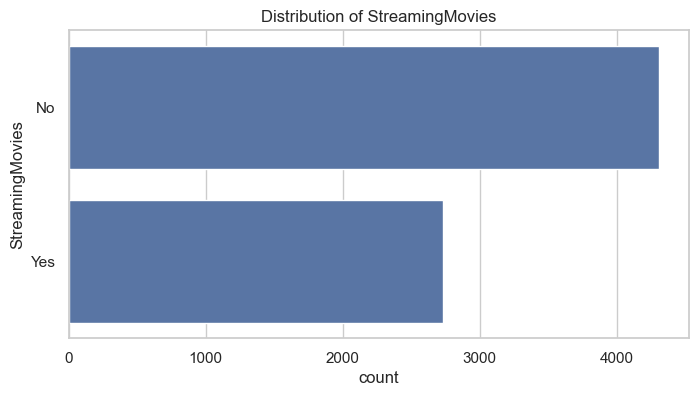

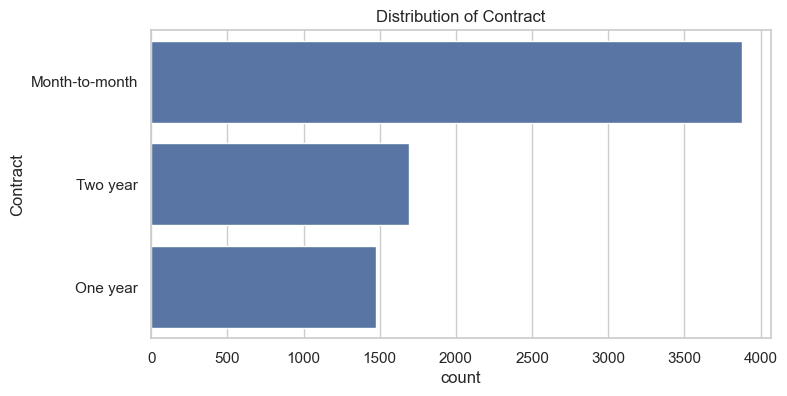

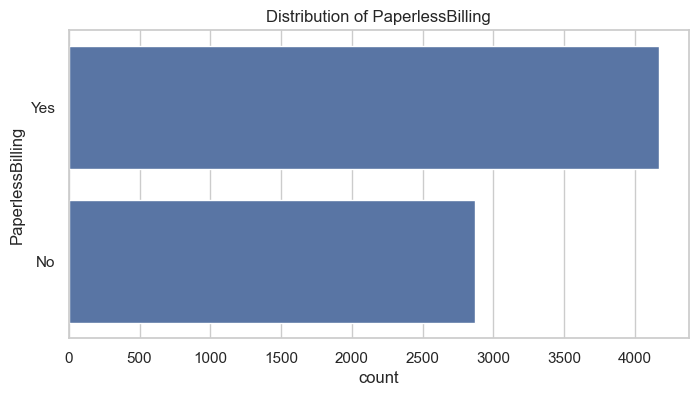

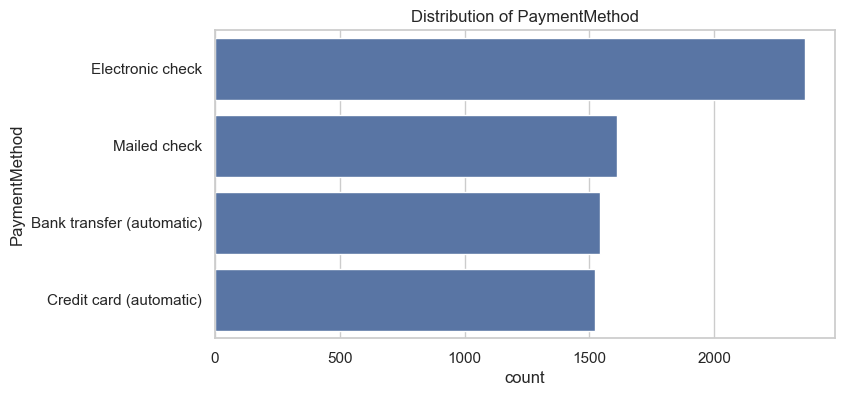

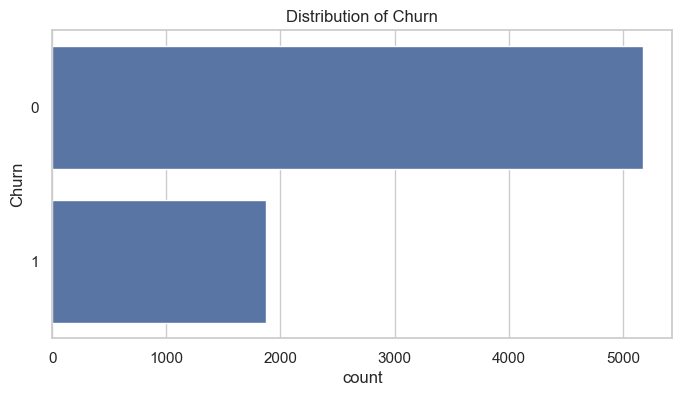

In [10]:
## Categorical features analysis
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

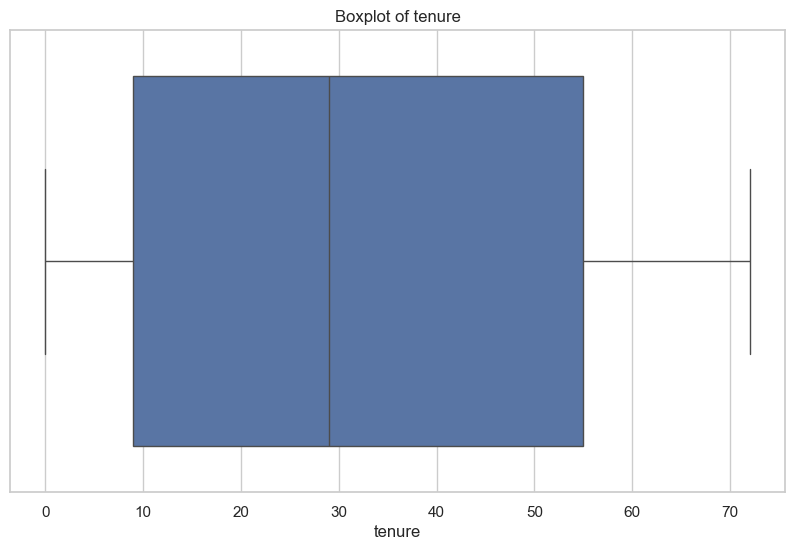

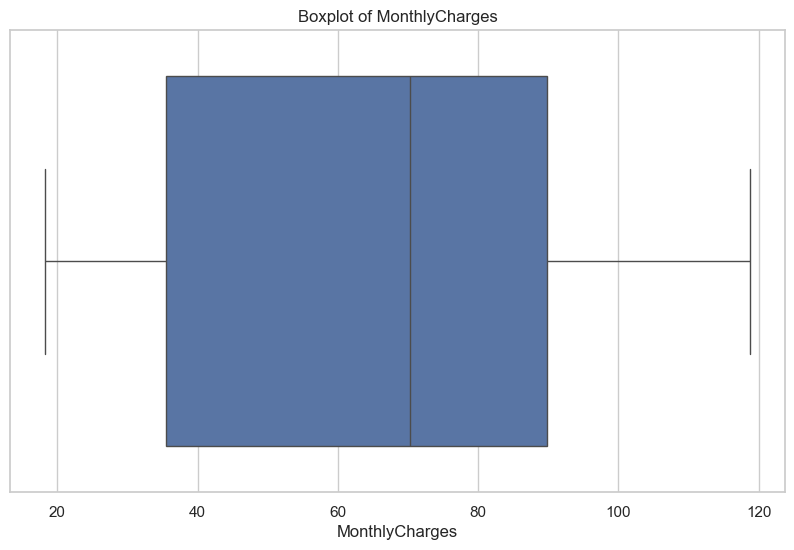

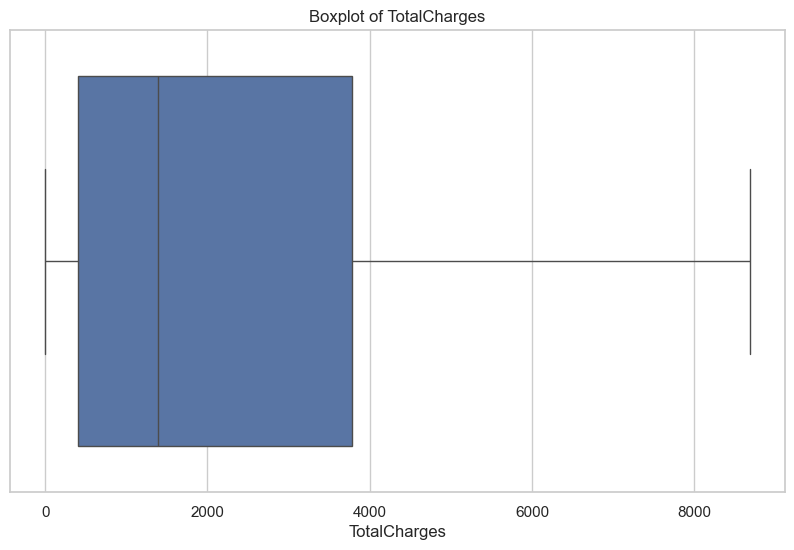

In [11]:
## Outliers Detection in Numerical Features
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()